In [1]:
import os
import shutil
import json
import tempfile
from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np

from run_experiments import run_experiments, Result

In [2]:
# set envvars
# os.environ["OS_MEMORY_ALLOC_OVERRIDE"] = "25000000"
# os.environ["ENGINE_PATH"] = "./target/x86_64-apple-darwin/release/hash_engine"
os.environ["RUST_LOG"] = "info"
os.environ["ENGINE_WAIT_TIMEOUT"] = "1000"

In [3]:
# we need cwd to be the engine folder
os.chdir("./..")

In [4]:
# clear the output folders
def clear_outputs():
    try:
        shutil.rmtree('./output')
        shutil.rmtree('./parts')
    except FileNotFoundError:
        pass

In [5]:
def write_to_globals_and_benchmark(src_path: Path, globals_override: dict, num_steps: int):
    clear_outputs()
    with tempfile.TemporaryDirectory() as temp_folder:
        temp_path = shutil.copytree(
            src_path, 
            Path(temp_folder) / src_path.name # Python < 3.8 requires the directory to not already exist for copytree
        )
        
        # override the globals
        globals_path = temp_path / "src" / "globals.json"
        global_properties = json.loads(globals_path.read_text())
        global_properties.update(globals_override)
        globals_path.write_text(json.dumps(global_properties))
        
        # benchmark a single-run
        results = run_experiments(
            project_paths=[temp_path], 
            run_all_experiments=False,
            cli_args=["single-run", "--num-steps", f"{num_steps}"]
        )
        
        return results

In [6]:
def plot_time_and_mem(results):
    agents_to_uss = [(num_agents, res.max_uss_memory) for (num_agents, res) in results]
    agents_to_time = [(num_agents, res.time_to_completion) for (num_agents, res) in results]
    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_title('Max USS by Number of Agents')
    ax.set_xlabel('Number of Agents')
    # ax.set_xscale('log')
    ax.set_ylabel('Max USS (Unique Set Size) memory')
    ax.plot(*zip(*agents_to_uss))

    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_title('Time Taken by Number of Agents')
    ax.set_xlabel('Number of Agents')
    # ax.set_xscale('log')
    ax.set_ylabel('Time Taken (s)')
    ax.plot(*zip(*agents_to_time))

In [7]:
# src_path = Path("./benchmarking/experiments/num_agents/no_behaviors/init_js/2_fields")
# write_to_globals_and_benchmark(src_path, {"num_agents": 5}, num_steps=2)

### Benchmark Number of Agents without Behaviors

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpc1u4fj8_/no_fields single-run --num-steps 10
Time taken: 1.4143893718719482
max_vms_memory: 9225211904
max_rss_memory: 48099328
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp1ahugk7b/no_fields single-run --num-steps 10
Time taken: 1.528874397277832
max_vms_memory: 9380421632
max_rss_memory: 49717248
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpwb3xmaea/no_fields single-run --num-steps 10
Time taken: 1.514254093170166
max_vms_memory: 9292435456
max_rss_memory: 54898688
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpm23d89f9/no_fields single-run --num-steps 10
Time taken: 1.961864709854126
max_vms_memory: 9360007168
max_rss_memory: 83644416
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp379n4ahv/no_fields single-run --num-steps 10
Time taken: 5.376662731170654
max_vms_memory: 9436073984
max_rss_memory: 203821056
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpjhpuh6mm/no_fields single-run --num-steps 10
Time taken: 39.74739480018616
max_vms_memory: 9689448448
max_rss_memory: 981032960
Running Experiment finished


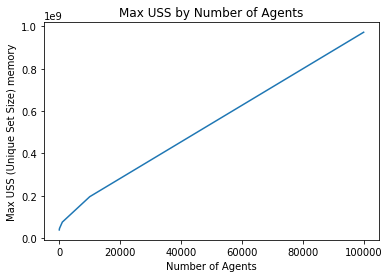

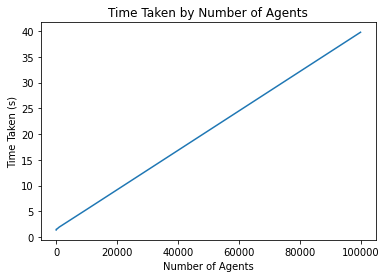

In [8]:
src_path = Path("./benchmarking/experiments/num_agents/no_behaviors/init_js/no_fields")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except (AttributeError, IndexError): # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpk086x1kg/1_field single-run --num-steps 10
Time taken: 1.5375614166259766
max_vms_memory: 9292337152
max_rss_memory: 48836608
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.22s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpnjw2lf5a/1_field single-run --num-steps 10
Time taken: 1.5235116481781006
max_vms_memory: 9359446016
max_rss_memory: 50442240
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp24p0scd9/1_field single-run --num-steps 10
Time taken: 1.6307950019836426
max_vms_memory: 9380519936
max_rss_memory: 55406592
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpvo6g9clk/1_field single-run --num-steps 10
Time taken: 1.979583501815796
max_vms_memory: 9246765056
max_rss_memory: 87990272
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp23u2wzen/1_field single-run --num-steps 10
Time taken: 5.418209075927734
max_vms_memory: 9301856256
max_rss_memory: 201220096
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpaaaewsj0/1_field single-run --num-steps 10
Time taken: 40.12502717971802
max_vms_memory: 9893326848
max_rss_memory: 1146454016
Running Experiment finished


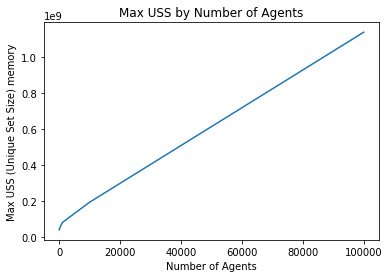

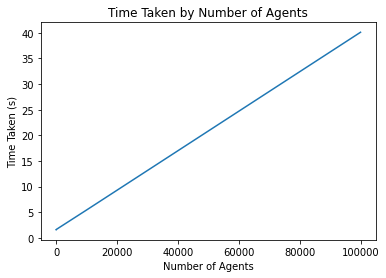

In [9]:
src_path = Path("./benchmarking/experiments/num_agents/no_behaviors/init_js/1_field")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except AttributeError: # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.26s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp5ckjhljt/2_fields single-run --num-steps 10
Time taken: 1.5242674350738525
max_vms_memory: 9313312768
max_rss_memory: 47857664
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmppwsxl0i4/2_fields single-run --num-steps 10
Time taken: 1.52378511428833
max_vms_memory: 9426554880
max_rss_memory: 49864704
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp20jeu83w/2_fields single-run --num-steps 10
Time taken: 1.5345730781555176
max_vms_memory: 9359544320
max_rss_memory: 56279040
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpb27riits/2_fields single-run --num-steps 10
Time taken: 1.9688780307769775
max_vms_memory: 9246765056
max_rss_memory: 87003136
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.22s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpkdu8b014/2_fields single-run --num-steps 10
Time taken: 5.423962116241455
max_vms_memory: 9389940736
max_rss_memory: 215183360
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpt851_677/2_fields single-run --num-steps 10
Time taken: 40.8977997303009
max_vms_memory: 9840443392
max_rss_memory: 1313648640
Running Experiment finished


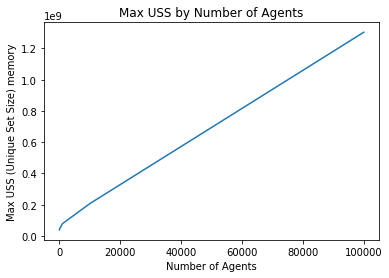

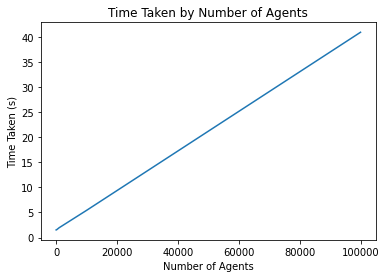

In [11]:
src_path = Path("./benchmarking/experiments/num_agents/no_behaviors/init_js/2_fields")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except AttributeError: # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)